In [4]:
import xarray
import numpy as np
import matplotlib.pyplot as plt

In [5]:
year=2012;
month=11;
# sea=xarray.open_dataset('SEA_SURFACE_HEIGHT_mon_mean_{y}-{m}_ECCO_V4r4_latlon_0p50deg.nc'.format(y=year,m=mon))
# print(sea.loc[dict(longitude=slice(-10, 10), latitude=slice(-40, 40))].SSH)
data_list = []
for year in range(2010,2015):
    for month in range(1,13):
        if month<10:
            mon = '0'+str(month)
        else:
            mon = str(month)
            data = xarray.open_dataset('SEA_SURFACE_HEIGHT_mon_mean_{y}-{m}_ECCO_V4r4_latlon_0p50deg.nc'.format(y=year,m=mon))
           
        data_new = data.loc[dict(longitude=slice(-180, 180), latitude=slice(-90, 90))].SSH
        data_list.append(data_new[0])





NameError: name 'data' is not defined

In [6]:

for i in range(1,6):
    if i==1:
        yearly_summed_data = data_arr[12*(i-1):12*(i),:,:]
    else:
        yearly_summed_data = yearly_summed_data + data_arr[12*(i-1):12*(i),:,:]
        
yearly_avg_data = yearly_summed_data/5

# print(np.min(data_arr),np.max(data_arr))
# print(np.min(yearly_summed_data),np.max(yearly_summed_data))
# print(np.min(yearly_avg_data),np.max(yearly_avg_data))
# print(yearly_summed_data.shape)
# print(yearly_avg_data.shape)

NameError: name 'data_arr' is not defined

In [7]:
yav_data = yearly_avg_data[7]
# print("yav",yav_data)

# print(np.max((yearly_avg_data[7]==yearly_avg_data[11])*1))
yav_data.shape
yav_data[:,0].shape




reshaped_arr = yav_data[:,0].reshape(len(yav_data[:,0]),1)
lon_data_proc = np.concatenate((yav_data, reshaped_arr), axis=1)
lon_diff_data = np.diff(lon_data_proc, axis=1)
# print(lon_data_proc.shape)
# print(lon_diff_data,'lon_diff')

lat_data_proc = np.concatenate((yav_data, yav_data[0,:].reshape(1,len(yav_data[0,:]))), axis=0)
lat_diff_data = np.diff(lat_data_proc, axis=0)
# print(lon_data_proc)


# for i in range(360):
#     for j in range(720):
#         print(lat_diff_data[i,j])

NameError: name 'yearly_avg_data' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math 

conversion_factor=111209;

lat_list = np.linspace(-89.75, 89.75, 360)
lon_list = np.linspace(-179.75, 179.75, 720);

X,Y = np.meshgrid(lat_list,lon_list,indexing="ij");
Y1, X1 = np.meshgrid(lat_list,lon_list,indexing="ij");






Y_data = np.diff(Y, axis=1)
reshaped_arr = Y_data[:,718].reshape(len(Y_data[:,718]),1)
Y_data2 = np.concatenate((Y_data, reshaped_arr), axis=1)

for i in range (0, 360, 1):
    for j in range (0,720,1):
        Y_data2[i,j]=Y_data2[i,j]*conversion_factor*np.cos(np.deg2rad(X[i,j]))





# print("this is X=>", X)


        

omega = 7.2921*(10**-5)

f=2*omega*np.sin(np.deg2rad(lat_list))
g = 9.8
dlat = 0.5*(111209)
# with conversion from deg to meter;


# I have to change the dlat and dlon accordingly
# print("this is Y2",Y_data2)

print(np.min(Y_data2))
lat_grad = (g/f.reshape(len(f),1))*(lat_diff_data/dlat)   #.reshape(len(lat_list),1))
lon_grad = (-g/f.reshape(len(f),1))*(lon_diff_data/Y_data2) #.reshape(1,len(lon_list)))

for i in range (360):
    for j in range (720):
        if(i%2):
            lat_grad[i,j]=math.nan
            lon_grad[i,j]=math.nan
      

# for i in range (0, 360, 1):
#     for j in range (0,720,1):
#         print(lat_grad[i,j])


# Z_lat = lat_grad
# Z_lon = lon_grad

# fig=plt.figure(figsize=(14,8))
# cp = ax1.contourf(X1, Y1, Z_lon)
# ax1.set_title('Filled Contours Plot')
# ax1.set_xlabel('x (cm)')
# ax1.set_ylabel('y (cm)')

# ax2 = fig.add_subplot(1,2,2)
# cp = ax2.contourf(X1, Y1, Z_lat)
# ax2.set_title('Filled Contours Plot')
# ax2.set_xlabel('x (cm)')
# ax2.set_ylabel('y (cm)')

242.6196311236914


NameError: name 'lat_diff_data' is not defined

[[-179.75 -179.25 -178.75 ...  178.75  179.25  179.75]
 [-179.75 -179.25 -178.75 ...  178.75  179.25  179.75]
 [-179.75 -179.25 -178.75 ...  178.75  179.25  179.75]
 ...
 [-179.75 -179.25 -178.75 ...  178.75  179.25  179.75]
 [-179.75 -179.25 -178.75 ...  178.75  179.25  179.75]
 [-179.75 -179.25 -178.75 ...  178.75  179.25  179.75]]
[[-89.75 -89.75 -89.75 ... -89.75 -89.75 -89.75]
 [-89.25 -89.25 -89.25 ... -89.25 -89.25 -89.25]
 [-88.75 -88.75 -88.75 ... -88.75 -88.75 -88.75]
 ...
 [ 88.75  88.75  88.75 ...  88.75  88.75  88.75]
 [ 89.25  89.25  89.25 ...  89.25  89.25  89.25]
 [ 89.75  89.75  89.75 ...  89.75  89.75  89.75]]


NameError: name 'lat_grad' is not defined

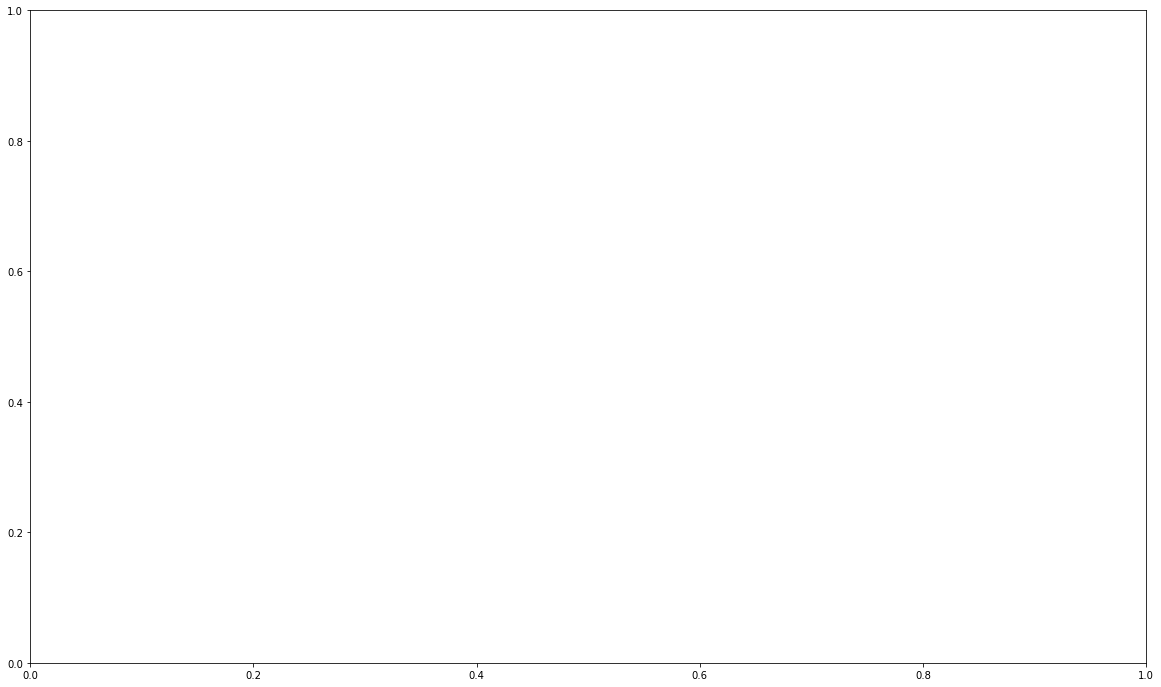

In [9]:
fig, ax = plt.subplots(figsize =(20, 12))

print(X1)
print(Y1)


ax.quiver(lat_grad,lon_grad, Y1, X1);
ax.quiver(X1, Y1, lat_grad, lan_grad);
# # print(lat_grad)
# print(lon_grad)

# print(lat_diff_data,"this is")
# print(lat_grad,"lat grad")
 
# print(lon_grad,"lon_grad")
# ax.xaxis.set_ticks([])
# ax.yaxis.set_ticks([])


 
# show plot
plt.show()